In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('winequality-red.csv')

Example of the first 10 rows of the wine data

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
index = np.random.rand(len(data)) < 0.8

In [8]:
train = data[index]
test = data[~index]

In [9]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1266.00000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000
mean,8.31951,0.524408,0.275411,2.550079,0.088795,15.800158,46.814771,0.996757,3.309186,0.660916,10.399908,5.619273
std,1.74699,0.178148,0.195299,1.451927,0.050799,10.493756,33.516132,0.001904,0.155350,0.175420,1.055345,0.818023
min,4.60000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.10000,0.390000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995620,3.210000,0.550000,9.500000,5.000000
50%,7.90000,0.520000,0.260000,2.200000,0.079000,13.000000,38.000000,0.996800,3.310000,0.620000,10.100000,6.000000
75%,9.20000,0.633750,0.430000,2.600000,0.090750,21.000000,63.000000,0.997820,3.400000,0.730000,11.000000,6.000000
max,15.90000,1.580000,1.000000,15.400000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


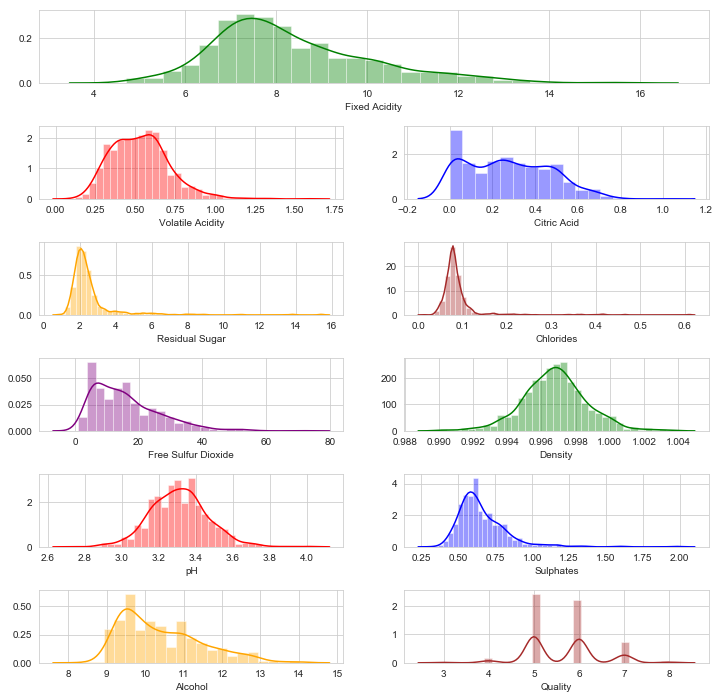

In [9]:
plt.figure(figsize=(12,12))
sns.set_style("whitegrid")
grid = plt.GridSpec(6, 2, wspace=0.2, hspace=0.6)
plt.subplot(grid[0, 0:])
sns.distplot(train['fixed acidity'], color="green", axlabel="Fixed Acidity")
plt.subplot(grid[1, 0])
sns.distplot(train['volatile acidity'], color="red", axlabel="Volatile Acidity")
plt.subplot(grid[1, 1])
sns.distplot(train['citric acid'], color="blue", axlabel="Citric Acid")
plt.subplot(grid[2, 0])
sns.distplot(train['residual sugar'], color="orange", axlabel="Residual Sugar")
plt.subplot(grid[2, 1])
sns.distplot(train['chlorides'], color="brown", axlabel="Chlorides")
plt.subplot(grid[3, 0])
sns.distplot(train['free sulfur dioxide'], color="purple", axlabel="Free Sulfur Dioxide")
plt.subplot(grid[3, 1])
sns.distplot(train['density'], color="green", axlabel="Density")
plt.subplot(grid[4, 0])
sns.distplot(train['pH'], color="red", axlabel="pH")
plt.subplot(grid[4, 1])
sns.distplot(train['sulphates'], color="blue", axlabel="Sulphates")
plt.subplot(grid[5, 0])
sns.distplot(train['alcohol'], color="orange", axlabel="Alcohol")
plt.subplot(grid[5, 1])
sns.distplot(train['quality'], color="brown", axlabel="Quality")

Text(0, 0.5, 'Quality')

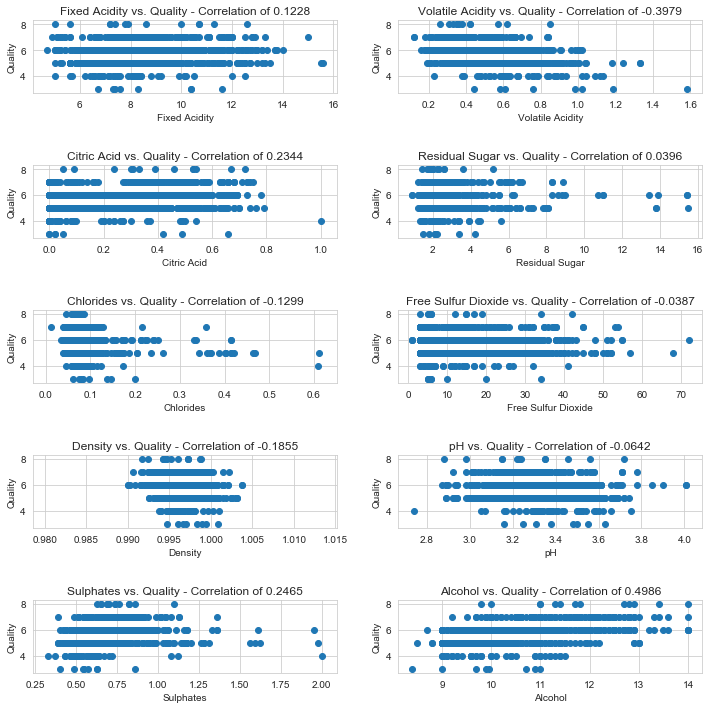

In [10]:
plt.figure(figsize=(12,12))
grid = plt.GridSpec(5, 2, wspace=0.2, hspace=1)
plt.subplot(grid[0, 0])
plt.scatter(x=train['fixed acidity'], y=train['quality'])
plt.title('Fixed Acidity vs. Quality - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['fixed acidity'], y=train['quality'])[0,1],4)))
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')
plt.subplot(grid[0, 1])
plt.scatter(x=train['volatile acidity'], y=train['quality'])
plt.title('Volatile Acidity vs. Quality - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['volatile acidity'], y=train['quality'])[0,1],4)))
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.subplot(grid[1, 0])
plt.scatter(x=train['citric acid'], y=train['quality'])
plt.title('Citric Acid vs. Quality - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['citric acid'], y=train['quality'])[0,1],4)))
plt.xlabel('Citric Acid')
plt.ylabel('Quality')
plt.subplot(grid[1, 1])
plt.scatter(x=train['residual sugar'], y=train['quality'])
plt.title('Residual Sugar vs. Quality - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['residual sugar'], y=train['quality'])[0,1],4)))
plt.xlabel('Residual Sugar')
plt.ylabel('Quality')
plt.subplot(grid[2, 0])
plt.scatter(x=train['chlorides'], y=train['quality'])
plt.title('Chlorides vs. Quality - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['chlorides'], y=train['quality'])[0,1],4)))
plt.xlabel('Chlorides')
plt.ylabel('Quality')
plt.subplot(grid[2, 1])
plt.scatter(x=train['free sulfur dioxide'], y=train['quality'])
plt.title('Free Sulfur Dioxide vs. Quality - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['free sulfur dioxide'], y=train['quality'])[0,1],4)))
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Quality')
plt.subplot(grid[3, 0])
plt.scatter(x=train['density'], y=train['quality'])
plt.title('Density vs. Quality - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['density'], y=train['quality'])[0,1],4)))
plt.xlabel('Density')
plt.ylabel('Quality')
plt.subplot(grid[3, 1])
plt.scatter(x=train['pH'], y=train['quality'])
plt.title('pH vs. Quality - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['pH'], y=train['quality'])[0,1],4)))
plt.xlabel('pH')
plt.ylabel('Quality')
plt.subplot(grid[4, 0])
plt.scatter(x=train['sulphates'], y=train['quality'])
plt.title('Sulphates vs. Quality - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['sulphates'], y=train['quality'])[0,1],4)))
plt.xlabel('Sulphates')
plt.ylabel('Quality')
plt.subplot(grid[4, 1])
plt.scatter(x=train['alcohol'], y=train['quality'])
plt.title('Alcohol vs. Quality - Correlation of ' + 
          str(np.round(np.corrcoef(x=train['alcohol'], y=train['quality'])[0,1],4)))
plt.xlabel('Alcohol')
plt.ylabel('Quality')


## Defining the function to build the polynomial model

In [69]:
def polynomial_model(epochs, lr, x_model, y_model, W_model, b_model, k):
    
    tf.reset_default_graph()
    
    #Hyperparameters
    epochs = epochs #parameter of the function
    lr = lr #parameter of the function
    m = x_model.shape[1] #parameter of the function for the number of columns of x matrix
    
    #Model variables
    X = tf.placeholder('float64', name = 'X')
    Y = tf.placeholder('float64', name = 'y')
    k = k #parameter of the function: prints every k
    
    #Learnable parameters
    W = tf.Variable(W_model, name = 'W')
    b = tf.Variable(b_model, name = 'b')
    
    #Hypothesis
    with tf.name_scope('Hypothesis'):
        y_hat = tf.add(tf.matmul(X, W, name = 'Matrix_Product'), b, name = 'Hypothesis_Product')

    #Mean Squared Error for Cost Function - J(m,b)
    with tf.name_scope('Cost_Function'):
        error = tf.reduce_mean(tf.square(y_hat-Y)) / 2

    #Gradient Descent
    with tf.name_scope('Gradient'):
        optimizer = tf.train.GradientDescentOptimizer(lr).minimize(error)

    #Creating the error summary
    error_summary = tf.summary.scalar(name='Error_Summary', tensor=error)
    
    graph_dir = (
        './graphs/graph_epochs='+str(epochs)+
        'lr='+str(lr)+
        'polynomial_degree=2'
    )
    
    with tf.Session() as sess:
        tf.initialize_all_variables().run()
        print('Variables successfully initialized')
        writer = tf.summary.FileWriter(graph_dir, sess.graph)
        print('Directory created in', graph_dir)
        for epoch in range(epochs):
            sess.run(optimizer, feed_dict={X : x_model, Y : y_model})
            if (epoch+1)%k == 0:
                e_summary = sess.run(error_summary, feed_dict = {X : x_model, Y : y_model})
                e = sess.run(error, feed_dict = {X : x_model, Y : y_model})
                writer.add_summary(e_summary, epoch)
                print(
                    'Epoch', epoch+1, ': \n',
                    'Bias = ', sess.run(b)
                )
                for i in range(0, m):
                    print(
                        'Variable', i+1, ' = ', sess.run(W)[i]
                    )
                print('error = ', '{:,}'.format(e))
                print('\n')
        writer.close()
    sess.close()

## Transforming x and y to build input matrix

In [67]:
#For x variables
#Volatile Acidity and Alcohol
x1 = train['volatile acidity'].values
x2 = train['alcohol'].values
x_dict = {'var1': x1,
          'var2': x2, 
          'var3': x1**2, 
          'var4': x2**2, 
          'var5': x1*x2, 
          'var6': (x1**2)*x2, 
          'var7': x1*(x2**2), 
          'var8': (x1**2)*(x2**2)}
x_train = pd.DataFrame(x_dict)
print('x tensor shape:', x_train.shape)

#For y variable
y_train = train['quality'].values.reshape(len(train['quality']),1)
print('y tensor shape', y_train.shape)

x tensor shape: (1266, 8)
y tensor shape (1266, 1)


## Initial values for Weights and Bias

In [68]:
#To initialize weights
w_train = np.random.rand(x_train.shape[1],1)*10
print('Weights:')
for i in range(0,len(w_train)):
    print('Variable ', i+1, ' Initial Weight: ', w_train[i], sep = '')
#To initialize weights
b_train = (np.random.rand(1)*10).reshape(1,1)
print('Bias:', b_train[0])

Weights:
Variable 1 Initial Weight: [3.6974056]
Variable 2 Initial Weight: [6.15685777]
Variable 3 Initial Weight: [3.00277377]
Variable 4 Initial Weight: [6.30120448]
Variable 5 Initial Weight: [3.65485112]
Variable 6 Initial Weight: [0.64184323]
Variable 7 Initial Weight: [7.02159447]
Variable 8 Initial Weight: [6.37466002]
Bias: [9.98423406]


In [70]:
polynomial_model(
    epochs = 1000, 
    lr = 0.00001,
    x_model = x_train,
    y_model = y_train,
    W_model = w_train,
    b_model = b_train,
    k = 50
)

Instructions for updating:
Use tf.cast instead.
Variables successfully initialized
Directory created in ./graphs/graph_epochs=1000lr=1e-05polynomial_degree=2
Epoch 50 : 
 Bias =  [[9.90564792]]
Variable 1  =  [3.64522779]
Variable 2  =  [5.34387839]
Variable 3  =  [2.96521749]
Variable 4  =  [-2.18796983]
Variable 5  =  [3.11545332]
Variable 6  =  [0.25330782]
Variable 7  =  [1.39623774]
Variable 8  =  [2.32212552]
error =  4,485.3173149341765


Epoch 100 : 
 Bias =  [[9.90739335]]
Variable 1  =  [3.639313]
Variable 2  =  [5.37700929]
Variable 3  =  [2.95748331]
Variable 4  =  [-1.66799457]
Variable 5  =  [3.05981742]
Variable 6  =  [0.17532862]
Variable 7  =  [0.88083173]
Variable 8  =  [1.53362584]
error =  2,130.26733286712


Epoch 150 : 
 Bias =  [[9.90830744]]
Variable 1  =  [3.63510546]
Variable 2  =  [5.39823833]
Variable 3  =  [2.95210758]
Variable 4  =  [-1.31064713]
Variable 5  =  [3.02083306]
Variable 6  =  [0.12152934]
Variable 7  =  [0.52697384]
Variable 8  =  [0.99418394]

## Graph of the Model using Gradient Descent Optimizer
<img src="GraphTB_Polynomial.png">